In [1]:
# change working directory to the root of the project (where jupyter was started)
import os
import psutil
%cd {psutil.Process(os.getpid()).parent().cwd()}

/home/matej/prace/ferda/ferda_regtrack


In [2]:
# %cd ~/prace/ferda/ferda_github/

In [3]:
import os
import pandas as pd
import yaml
from collections import defaultdict
from os.path import join
from utils.gt.mot import load_mot, eval_and_save
from IPython.display import Markdown
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 30)

In [4]:
# from ferda_cli import load_evaluations  # enable after python3 codebase conversion

def load_evaluations(experiments_config):
    evaluations = defaultdict(list)
    for directory, dirnames, filenames in \
            sorted(os.walk(experiments_config['dir']), key=lambda x: os.path.basename(x[0])):
        if directory == experiments_config['dir']:
            continue

        if ('experiment.yaml' in filenames) and ('evaluation.csv' in filenames):
            with open(join(directory, 'experiment.yaml'), 'r') as fr:
                experiment_config = yaml.load(fr)

            experiment_config['evaluation'] = join(directory, 'evaluation.csv')
            if 'results.txt' in filenames:
                experiment_config['mot_trajectories'] = join(directory, 'results.txt')
            evaluations[experiment_config['dataset_name']].append(experiment_config)
        else:
            pass
#             print('no experiment.yaml and/or evaluation.csv in {}'.format(directory))
    return evaluations

In [5]:
with open('experiments.yaml', 'r') as fr:
    experiments = yaml.load(fr)
evaluations = load_evaluations(experiments)

In [6]:
# # revaluate all
# for dataset, dataset_experiments in evaluations.items():
#     for experiment in dataset_experiments:
#         print(experiment['mot_trajectories'])
#         eval_and_save(experiment['dataset']['gt'], experiment['mot_trajectories'], experiment['evaluation'])

# Benchmarks

## Camera3-5min

,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp
experiment,,,,,,,,,,,,,,,
idtracker,0.891944,0.892043,0.891844,0.895978,0.896177,10,10,0,0,4671,4681,14,247,0.791867,13.781312
idtracker_nogaps,0.996689,0.996799,0.996578,0.996578,0.996799,10,10,0,0,144,154,0,5,0.993378,39.111585
toxtrac,0.643172,0.745830,0.565356,0.758000,0.999971,10,5,5,0,1,10890,108,210,0.755578,41.122685
180427_vaib,0.897800,0.897800,0.897800,0.898378,0.898378,10,10,0,0,4573,4573,10,386,0.796533,4.154986
initial,0.243889,0.325185,0.195111,0.369400,0.615667,10,0,8,2,10377,28377,29,73,0.138156,143.314538
fixed_cardinality,0.586821,0.586886,0.586756,0.820200,0.820382,10,8,2,0,8081,8091,75,419,0.638956,151.953196
ilp,0.602323,0.642253,0.567067,0.882622,0.999648,10,8,2,0,14,5282,83,365,0.880467,171.249054


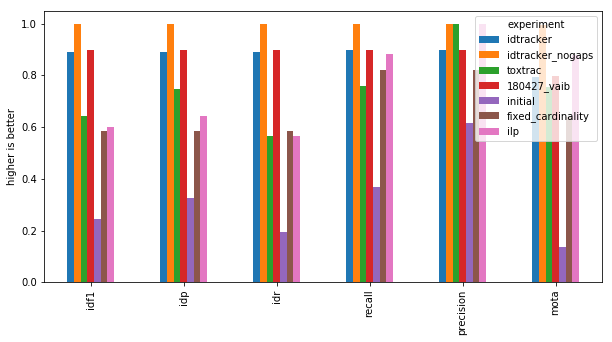

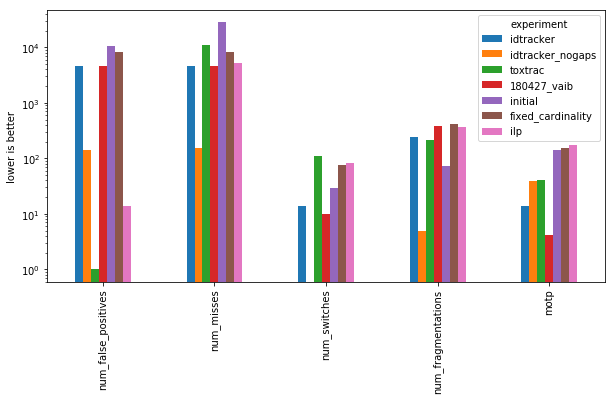

## Cam1_clip

,id_global_assignment,idf1,idfn,idfp,idp,idr,idtp,mostly_lost,mostly_tracked,mota,motp,motp_px,num_detections,num_false_positives,num_fragmentations,num_frames,num_matches,num_misses,num_objects,num_predictions,num_switches,num_unique_objects,obj_frequencies,partially_tracked,precision,pred_frequencies,recall,track_ratios
experiment,,,,,,,,,,,,,,,,,,,,,,,,,,,,
idtracker,NaN,0.605956,NaN,NaN,0.606024,0.605889,NaN,0,1,0.216296,63.196044,NaN,NaN,10568,259,NaN,NaN,10574,NaN,NaN,18,6,NaN,5,0.608506,NaN,0.608370,NaN
idtracker_nogaps,NaN,0.899656,NaN,NaN,0.899756,0.899556,NaN,0,6,0.799778,133.556985,NaN,NaN,2699,35,NaN,NaN,2705,NaN,NaN,2,6,NaN,0,0.900015,NaN,0.899815,NaN
toxtrac,NaN,0.097106,NaN,NaN,0.161196,0.069481,NaN,0,0,0.424852,133.370349,NaN,NaN,0,166,NaN,NaN,15362,NaN,NaN,167,6,NaN,6,1.000000,NaN,0.431037,NaN
toxtrac_tight_segmentation,NaN,0.652834,NaN,NaN,0.953204,0.496407,NaN,0,0,0.520296,195.002656,NaN,NaN,0,122,NaN,NaN,12939,NaN,NaN,13,6,NaN,6,1.000000,NaN,0.520778,NaN
180427_vaib,NaN,0.699556,NaN,NaN,0.699556,0.699556,NaN,0,2,0.400074,1.974294,NaN,NaN,8096,288,NaN,NaN,8096,NaN,NaN,6,6,NaN,4,0.700148,NaN,0.700148,NaN
initial,NaN,0.643000,NaN,NaN,0.643000,0.643000,NaN,0,3,0.418444,167.486351,NaN,NaN,7828,367,NaN,NaN,7828,NaN,NaN,46,6,NaN,3,0.710074,NaN,0.710074,NaN
ilp_cardinality_dense,NaN,0.780575,9046.0,1048.0,0.944848,0.664963,17954.0,0,2,0.702667,85.557593,9.249735,19001.0,1,348,4500.0,18973.0,7999,27000.0,19002.0,28,6,NaN,4,0.999947,NaN,0.703741,NaN
fixed_cardinality,NaN,0.661851,NaN,NaN,0.661925,0.661778,NaN,0,2,0.408889,138.025728,NaN,NaN,7960,355,NaN,NaN,7966,NaN,NaN,34,6,NaN,4,0.705120,NaN,0.704963,NaN
ilp,NaN,0.799974,NaN,NaN,0.969769,0.680778,NaN,0,2,0.700741,101.902034,NaN,NaN,1,333,NaN,NaN,8047,NaN,NaN,32,6,NaN,4,0.999947,NaN,0.701963,NaN


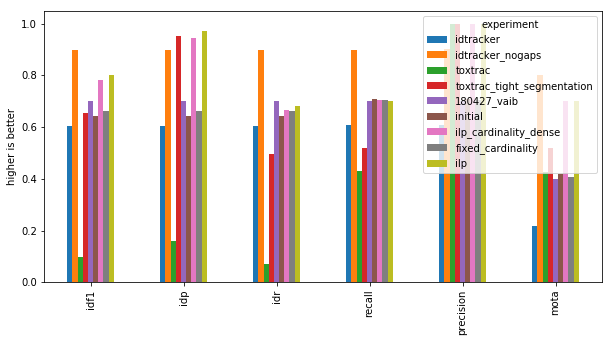

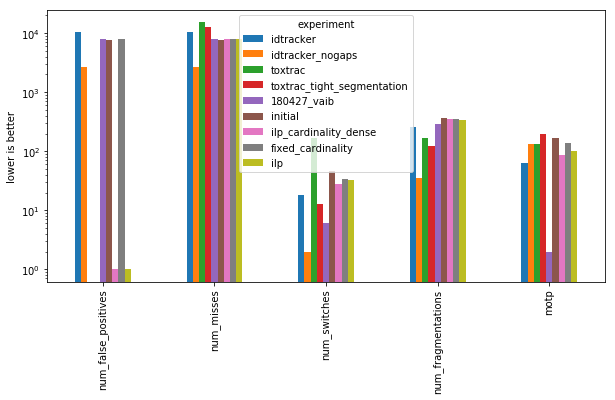

## 5Zebrafish_nocover_22min

,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp
experiment,,,,,,,,,,,,,,,
idtracker,0.799507,0.799533,0.799480,0.813533,0.813588,5,4,1,0,13980,13985,160,895,0.625000,75.908890
idtracker_nogaps,0.930458,0.930489,0.930427,0.947533,0.947597,5,5,0,0,3930,3935,132,234,0.893373,264.281000
toxtrac,0.925810,0.999985,0.861880,0.861880,0.999985,5,5,0,0,1,10359,0,311,0.861867,34.326583
180427_vaib,0.881635,0.881723,0.881547,0.882253,0.882430,5,5,0,0,8816,8831,29,987,0.764320,181.964081
initial,0.452867,0.452867,0.452867,0.932667,0.932667,5,5,0,0,5050,5050,243,708,0.862093,125.085584
fixed_cardinality,0.525004,0.525022,0.524987,0.914067,0.914128,5,5,0,0,6440,6445,257,717,0.824773,111.617870
ilp,0.490679,0.576825,0.426920,0.740027,0.999874,5,2,3,0,7,19498,170,1045,0.737667,114.899460


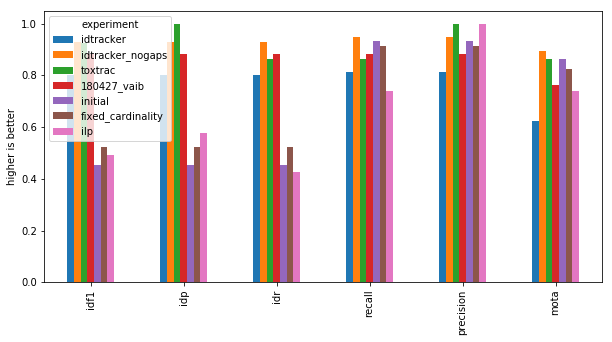

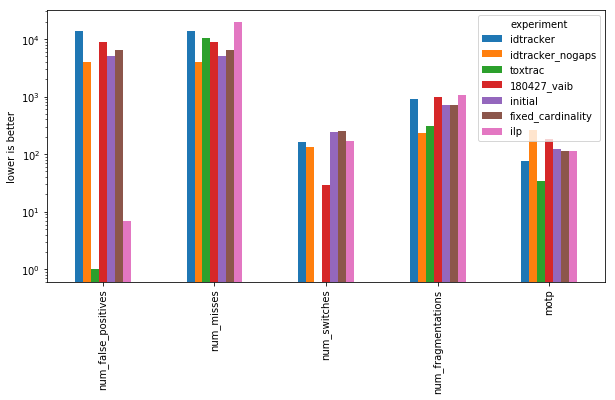

## Sowbug3_cut

,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp
experiment,,,,,,,,,,,,,,,
idtracker,0.703321,0.878017,0.586605,0.597802,0.894777,5,0,5,0,2367,13542,4,41,0.527383,151.559629
idtracker_nogaps,0.787323,0.982885,0.656668,0.667865,0.999644,5,0,5,0,8,11183,4,2,0.667508,146.714984
toxtrac,0.707434,0.992544,0.549569,0.553698,1.000000,5,0,5,0,0,15027,2,18,0.553638,64.270609
initial,0.565854,0.706311,0.471993,0.592248,0.886267,5,0,5,0,2559,13729,9,36,0.515979,159.596248
fixed_cardinality,0.519683,0.648766,0.433442,0.588833,0.881351,5,0,5,0,2669,13844,16,39,0.509088,287.155315
ilp,0.604521,0.821713,0.478141,0.581853,0.999949,5,0,5,0,1,14079,11,38,0.581497,188.251007


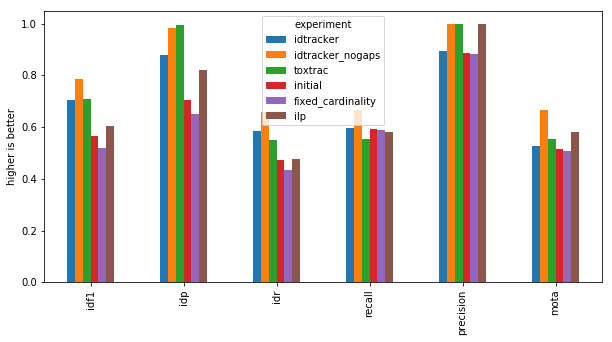

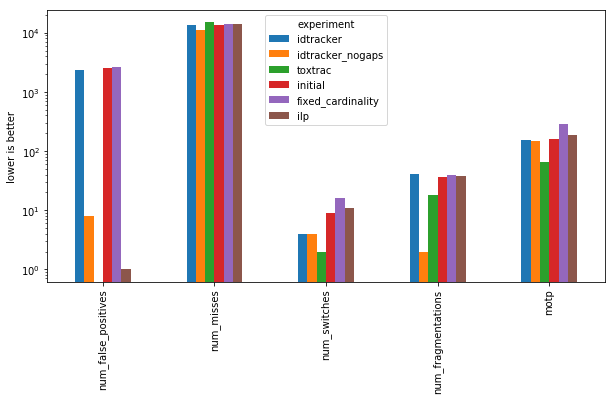

In [7]:
# plot tables and graphs
df_evaluations = {}
for dataset, dataset_experiments in evaluations.items(): 
    all_evals = []
    for experiment in dataset_experiments:
        df = pd.read_csv(experiment['evaluation'])
        df.insert(0, 'experiment', experiment['exp_name'])
        all_evals.append(df)
    df = pd.concat(all_evals).set_index('experiment')
    # df.drop(['obj_frequencies', 'pred_frequencies', 'track_ratios', 'id_global_assignment'], axis=1, inplace=True)
    
    df.name = dataset
    display(Markdown('## {experiment_name}'.format(experiment_name=df.name)))
    display(df)
    df_evaluations[df.name] = df
    # df.to_csv('{}_comparison.csv'.format(dataset_name))
    ax = df[['idf1', 'idp', 'idr', 'recall', 'precision','mota']].T.plot.bar(figsize=(10, 5)) # , title='dataset ' + dataset)
    _ = ax.set_ylabel('higher is better')
    plt.show(ax)
    ax = df[['num_false_positives', 'num_misses', 'num_switches','num_fragmentations', 'motp']].T.plot.bar(figsize=(10, 5), logy=True)  # , title='dataset ' + dataset)
    _ = ax.set_ylabel('lower is better')
    plt.show(ax)

## ID Precision Recall Graphs

In [10]:
# # renames for publications
df_evaluations['Ants1'] = df_evaluations.pop('Cam1_clip')
df_evaluations['Ants3'] = df_evaluations.pop('Camera3-5min')
df_evaluations['Zebrafish'] = df_evaluations.pop('5Zebrafish_nocover_22min')
df_evaluations['Sowbugs3'] = df_evaluations.pop('Sowbug3_cut')

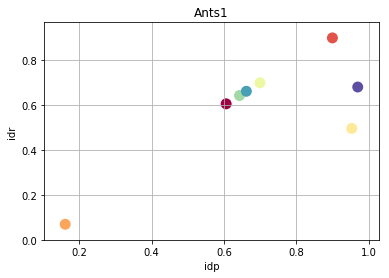

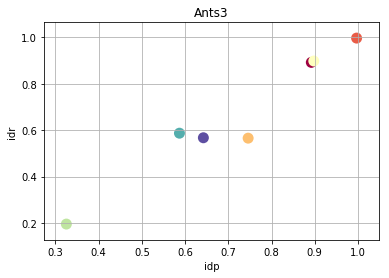

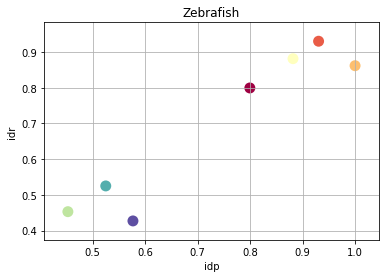

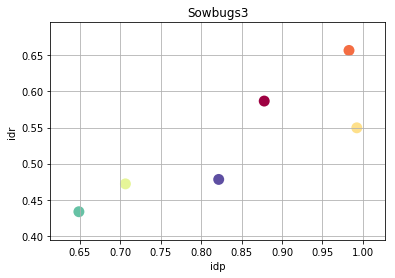

In [14]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
for dataset, df in df_evaluations.items():
#     try:
#         as_list = df.index.tolist()
#         idx = as_list.index('180427_vaib')
#         as_list[idx] = 'ferda'
#         df.index = as_list
#     except:
#         pass
#     try:
#         as_list = df.index.tolist()
#         idx = as_list.index('180819_Sowbug3_cut_new_setup')
#         as_list[idx] = 'ferda'
#         df.index = as_list
#     except:
#         pass    	
#     df = df[~((df.index == 'initial') | (df.index == 'fixed_cardinality') | (df.index == 'toxtrac_tight_segmentation'))]
    fig, ax = plt.subplots()

    
    df.plot('idp', 'idr', kind='scatter', ax=ax, s=120, linewidth=0, 
            c=range(len(df)), colormap=cmap, colorbar=None, title=dataset, grid=True, legend=True)

#     for k, v in df.iterrows():
#         ax.annotate(k, v[['idp', 'idr']],
#                     xytext=(10,-5), textcoords='offset points', 
#                     family='sans-serif', fontsize=13, color='darkslategrey')
    # 
    plt.savefig('/home/matej/Private/Dropbox/shared/wacv19/images/{}.png'.format(dataset), bbox_inches='tight')